[1] [Algorithms for the multi-armed bandit problem](http://arxiv.org/pdf/1402.6028v1.pdf)

In [2]:
from strategies import *
from tqdm import tqdm

Real:  7070 2930 

One by One      0.0
Goods   | Bads     | Tests    | H-Tests | Mean H-Test
 7070   |  2930    | 10000    | 10000   | 1.0000 

Pairwise      1.0
Goods   | Bads     | Tests    | H-Tests | Mean H-Test
 7070   |  2930    |  8790    |  5860   | 2.0000 

3-wise      1.5539249146757679
Goods   | Bads     | Tests    | H-Tests | Mean H-Test
 7070   |  2930    |  9079    |  4526   | 3.0000 

Double or Divide      4327
Goods   | Bads     | Tests    | H-Tests | Mean H-Test
 7070   |  2930    |  9757    |  5430   | 2.7232 

Langsam Adaptive Bayesian      8610
Goods   | Bads     | Tests    | H-Tests | Mean H-Test
 7070   |  2930    | 11894    |  3284   | 9.4373 



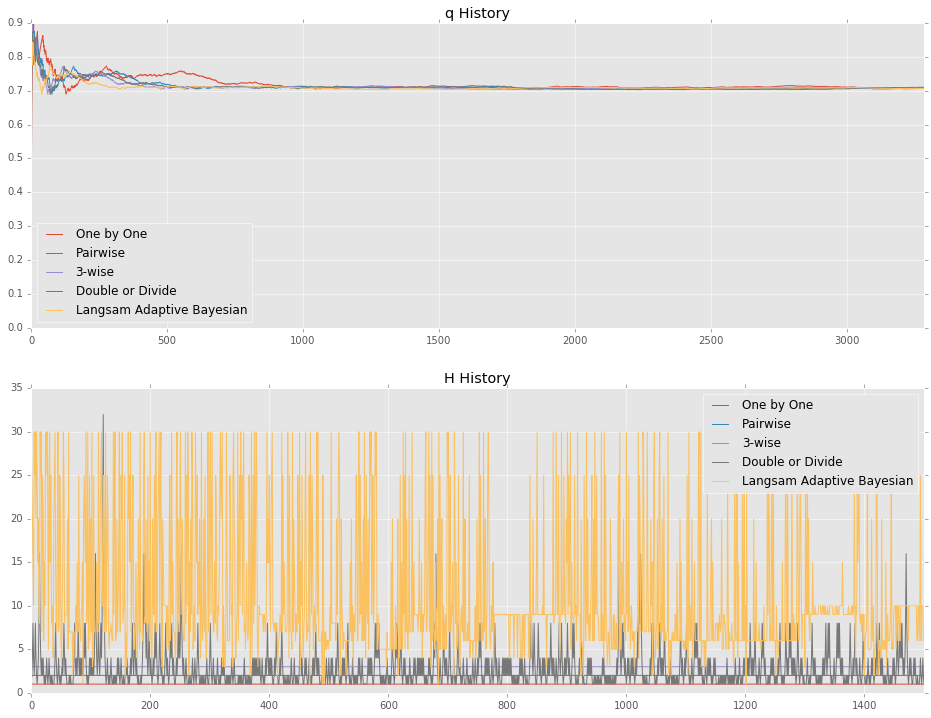

In [4]:
s = Sample(0.707, n=10000)
# s.generate(seed=np.random.randint(100,400))
# strats = [DOD, NonAdaptiveDecision,OneByOne, Pairwise]

strats = [OneByOne(s), Pairwise(s), Xwise(s, 3), DOD(s), Langsam(s)]
fig = None
print("Real: ",s.G, s.B,'\n')
for strat in strats:
    policy = strat
    policy.test()
    print (policy.name, '    ', policy.gsize)
    print ("======================================================")
    if policy.queue.size != 0:
        print ("WARNING: Does not finish")
    print ("Goods   | Bads     | Tests    | H-Tests | Mean H-Test")
    print ("{:5d}   | {:5d}    | {:5d}    | {:5d}   | {:.4f} ".format(policy.G, policy.B,
                                                       policy.Ntests, policy.Htests,
                                                       np.mean(policy.H_history)))
    print()
    fig, ax = policy.plot(fig)
ax[1].set_xlim(0,1500)
# ax[1].set_ylim(0,100)
plt.show()